In [1]:
import pandas as pd

In [2]:
embedding_path = 'embedding/glove.42B.300d.txt'

In [3]:
df = pd.read_csv(embedding_path, sep=' ', index_col=0, header=None, quoting=3)

In [199]:
"..." in df.index

True

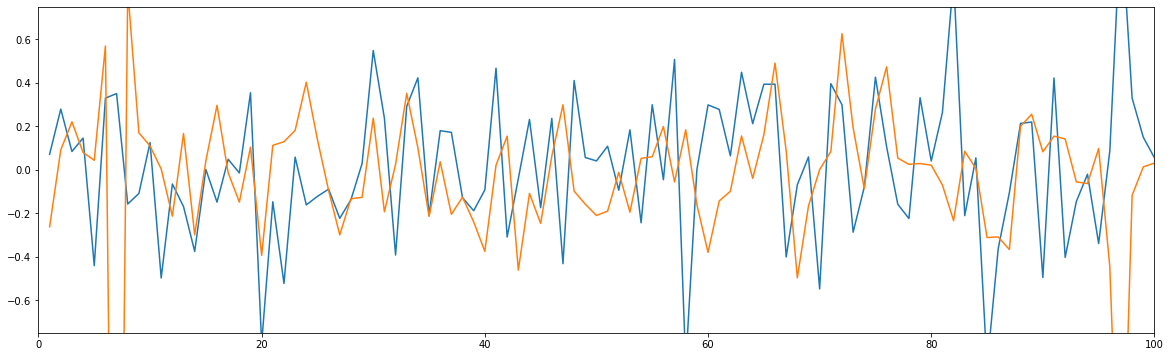

In [137]:
a = df.loc["can't"]
b = df.loc["cannot"]
c = df.loc["a"]

plt.figure(figsize=(20, 6))
plt.ylim(-0.75, 0.75)
plt.xlim(0, 100)
plt.plot(a)
plt.plot(b)
# plt.plot(c)
plt.show()

# Daily

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [73]:
def load(data_path):
    with open(data_path) as f:
        lines = f.readlines()
    data = [line.strip().split('__eou__')[:-1] for line in lines]
    convs = [[s.strip().lower().split() for s in d] for d in data]
    return convs

In [74]:
train_path = 'data/daily/train/dialogues_train.txt'
valid_path = 'data/daily/validation/dialogues_validation.txt'
test_path = 'data/daily/test/dialogues_test.txt'

train_convs = load(train_path)
valid_convs = load(valid_path)
test_convs = load(test_path)

In [182]:
with open(train_path) as f:
    lines = f.readlines()
data = [line.strip().split('__eou__')[:-1] for line in lines]

In [237]:
re.search(r' - ', 'a  -  b')[0]

' - '

In [250]:
def load(data_path):
    with open(data_path) as f:
        lines = f.readlines()
    convs = [line.strip().split('__eou__')[:-1] for line in lines]
    return convs

convs = load(train_path)

def clean(convs):
    def _clean(s):
        s = s.strip().lower()
        s = re.sub(r'[()\[\]#$@&*%:"“”~‘=+/]', ' ', s)
        s = re.sub(r' [-—] ', ' ', s)
        s = re.sub(r'(\w)\.(\w)', r'\1 . \2', s)
        s = s.replace('p . m.', ' pm ')
        s = s.replace('a . m.', ' am ')
        s = s.replace('。', '.')
        s = s.replace(';', ',')
        s = re.sub(r'(\w+)\s+’\s+(\w+)', r"\1'\2", s)
        s = re.sub(r'\d+(\.|:,)?\d*', r' <number> ', s)
        s = s.split()
        return s

    convs_clean = []
    for conv in convs:
        convs_clean.append(list(map(_clean, conv)))
    return convs_clean

convs = clean(convs)

In [251]:
def filter(convs):
    cnt = 0
    for i in range(len(convs)):
        for j in range(len(convs[i])):
            for k in range(len(convs[i][j])):
                word = convs[i][j][k]
                if word == '<number>':
                    continue
                f = False
                for c in word:
                    if not c.isalpha() and c not in ",.?!'":
                        f = True
                if f:
                    print(f'[{i},{j},{k}] {word}')
                    cnt += 1
        if cnt >= 800:
            break
                    
filter(convs)

[1,0,3] push-ups
[1,1,20] push-ups
[1,3,3] push-ups
[5,9,3] serious-minded
[7,7,17] twelve-foot
[7,7,22] two-car
[8,1,6] mother-in-law
[8,3,3] nit-pick
[8,8,1] mother-in-law
[11,4,6] host--only
[24,4,5] focus-free
[41,6,6] first-cousins
[41,10,10] step-mother
[41,12,8] step-mother
[43,3,6] top-level
[43,7,11] thing-i
[61,6,37] face-to-face
[61,8,21] so-called
[66,6,12] four-hundred-dollar
[66,12,22] bar-code
[66,16,37] perfect-looking
[68,8,17] fair-weather
[69,6,19] anti-particles
[74,6,11] all-right
[74,7,0] all-right
[96,7,5] self-control
[100,0,16] stir-fry
[104,3,6] fair-haired
[108,1,12] tow-truck
[116,0,6] country-and-western
[140,1,11] up-to
[143,0,7] part-timer
[143,1,0] part-timer
[143,3,5] part-time
[158,28,29] in-depth
[160,2,12] outside-you
[160,2,17] badminton-or
[160,5,14] summer-you
[162,10,9] again-b
[166,6,19] anti-particles
[175,3,6] sick-leave
[180,6,9] three-month
[198,1,14] e-mail
[209,3,23] two-year
[210,1,14] five-dollar
[223,12,7] hip-hop
[233,3,40] long-term
[

[3284,5,9] business-related
[3284,9,11] hi-tech
[3289,6,29] post-graduate
[3289,14,27] well-paying
[3293,1,11] us-my
[3298,7,7] crisis-ridden
[3298,11,5] cross-cultural
[3303,4,0] no-one
[3303,9,41] -
[3317,10,16] so-called
[3322,3,5] in-between
[3322,4,8] wash-and-go
[3322,7,9] in-betweens
[3324,5,16] co-workers
[3324,7,10] inter-office
[3342,6,17] over-ambitious
[3342,6,20] over-adored
[3345,4,10] g-rated
[3345,6,13] time-honoured
[3346,4,13] absent-minded
[3351,1,1] jude-he's
[3351,3,15] marriage-a
[3351,5,0] ha-ha
[3351,5,7] four-letter
[3353,6,8] short-term
[3355,1,3] ahead--what
[3355,5,6] before--when
[3365,5,3] n-u-g-e-n-t
[3368,3,5] two-year-old
[3369,6,3] seventeenth-century
[3372,1,8] scene-setting
[3383,2,1] mother-in-law
[3397,2,7] three-year-old
[3400,9,3] e-mail
[3401,6,15] ever-green
[3408,0,7] long-distance
[3409,5,48] flower-garden's
[3415,1,5] make-up
[3415,2,6] make-up
[3415,3,6] make-up
[3415,4,7] make-up
[3416,0,34] two-week
[3419,6,29] eight-hour


In [88]:
def sent_lens(convs):
    lens = []
    for conv in convs:
        for sent in conv:
            lens.append(len(sent))
            
    short = [l for l in lens if l <= 25]
    print('%.3f%%' % (len(short) / len(lens) * 100))
            
    stat(lens)
    plt.hist(lens, bins=30)
    plt.show()

89.832%
   len: 7740
  mean: 13.776614987080103
   min: 2
  0.25: 7.0
median: 11.0
  0.75: 17.0
   max: 204


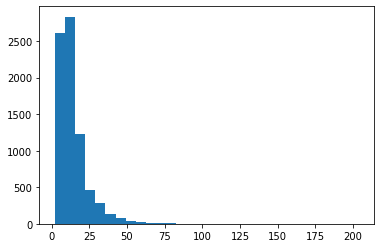

In [91]:
sent_lens(test_convs)

In [85]:
for conv in test_convs:
    for sent in conv:
        if len(sent) <= 1:
            print(sent)